In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and testing sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

Now let's check out an example

In [3]:
# Show the first training example
print(f"Training Sample: \n{train_data[0]}\n")
print(f"Training Label: {train_labels[0]}")

Training Sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

Woah, we get a large list of numbers, followed (the data) by a single number (the class label).

What about the shapes?

In [4]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

Okay, 60,000 training examples each with shape (28,28) and a label each as well as 10,000 test examples of shape (28,28).

But these are just numbers, let's visualize.

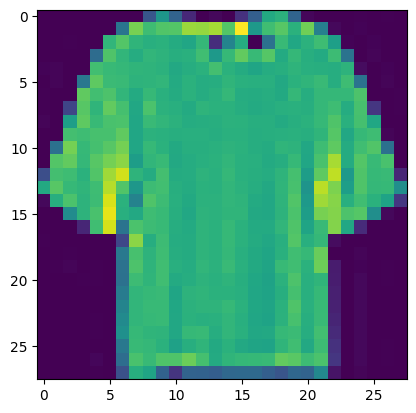

In [6]:
# Plot a single example 
plt.imshow(train_data[77])

Hmm, but what about it's label?

In [7]:
# Check our samples label
train_labels[77]

6

It looks like our labels are in numerical form. And while this is fine for a neural network, you might want to have them in human readable form.

Let's create a small list of the class names.

In [8]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

# How many classes are there (this will be our output shape)
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

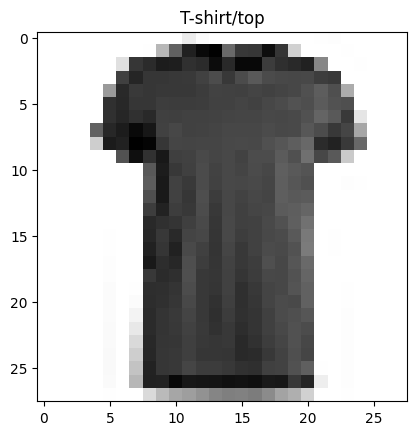

In [9]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # Change the colors to black and white
plt.title(class_names[train_labels[17]])

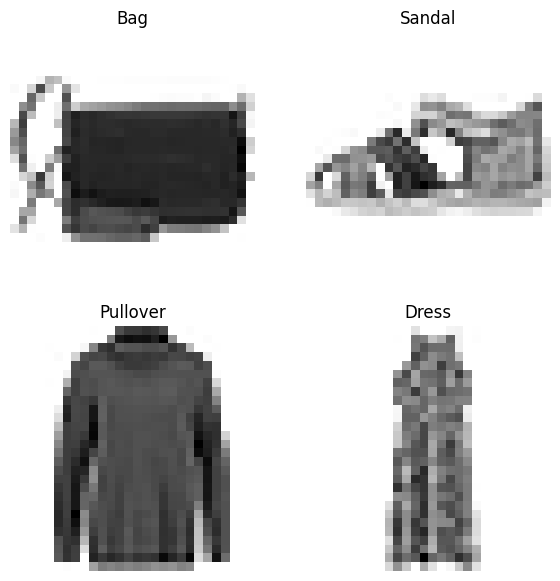

In [10]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [11]:
# Let's build a model
tf.random.set_seed(42)

# 1. Create the model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # Input layer (we had to reshape 28x28 to 784)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # Output shape is 10, activation is softmax
])

# 2.  Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Fit the model
non_norm_history = model.fit(train_data,
                             train_labels,
                             epochs=10,
                             validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 826us/step - loss: 2.5516 - accuracy: 0.0987 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 1s 755us/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 1s 780us/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 1s 758us/step - loss: 2.3029 - accuracy: 0.0968 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 1s 760us/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 1s 778us/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 1s 782us/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 -

In [12]:
# Check the shapes of our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [14]:
# Let's normalize the data
train_data = train_data/255.0
test_data = test_data/255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

Beautiful! Now our data is between 0 and 1. Let's see what happens when we model it.

We will use the same model as before except this time the data will be normalized.

In [15]:
# Set random seed 
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # Input layer (we had to reshape 28x28 to 784)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # Output shape is 10, activation is softmax
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model (to the normalized data)
norm_history = model_1.fit(train_data, train_labels, epochs=10, validation_data=(test_data,test_labels), verbose=1)

Epoch 1/10
1875/1875 [==============================] - 2s 785us/step - loss: 1.2932 - accuracy: 0.5544 - val_loss: 1.0560 - val_accuracy: 0.6171
Epoch 2/10
1875/1875 [==============================] - 1s 721us/step - loss: 0.9705 - accuracy: 0.6466 - val_loss: 0.9529 - val_accuracy: 0.6307
Epoch 3/10
1875/1875 [==============================] - 1s 768us/step - loss: 0.8805 - accuracy: 0.6635 - val_loss: 0.8758 - val_accuracy: 0.6520
Epoch 4/10
1875/1875 [==============================] - 1s 763us/step - loss: 0.8115 - accuracy: 0.7052 - val_loss: 0.7870 - val_accuracy: 0.7236
Epoch 5/10
1875/1875 [==============================] - 1s 781us/step - loss: 0.7314 - accuracy: 0.7442 - val_loss: 0.7217 - val_accuracy: 0.7504
Epoch 6/10
1875/1875 [==============================] - 1s 773us/step - loss: 0.6887 - accuracy: 0.7595 - val_loss: 0.6963 - val_accuracy: 0.7572
Epoch 7/10
1875/1875 [==============================] - 1s 786us/step - loss: 0.6727 - accuracy: 0.7623 - val_loss: 0.6926 -

Woah, we used the exact same model as before but we with normalized data we are now going to see a much higher accuracy value!

Let's plot each model's history (their loss curves).

<Axes: title={'center': 'Normalized Data'}>

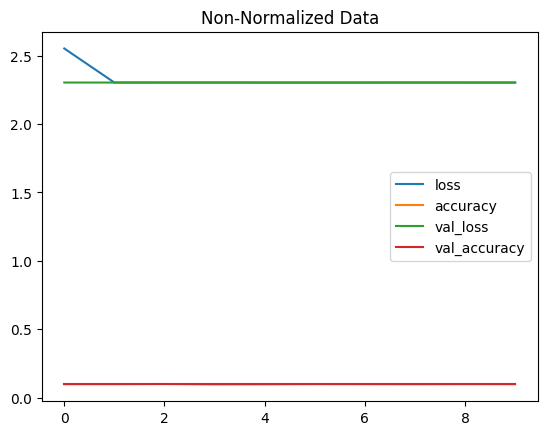

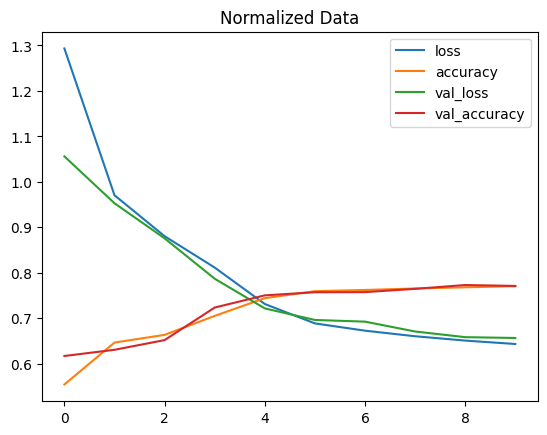

In [16]:
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-Normalized Data")

# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

How about we find the ideal learning rate and see what happens?

We will use the same architecture we have been using.

In [17]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**((epoch/20)))

# 3. Fit the model
find_lr_history = model_2.fit(train_data, train_labels, epochs=40, validation_data=(test_data, test_labels), callbacks=[lr_scheduler], verbose=1)

Epoch 1/40
1875/1875 [==============================] - 2s 842us/step - loss: 1.4043 - accuracy: 0.4895 - val_loss: 1.0051 - val_accuracy: 0.6269 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 1s 778us/step - loss: 0.8649 - accuracy: 0.6806 - val_loss: 0.8136 - val_accuracy: 0.7015 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 1s 763us/step - loss: 0.7695 - accuracy: 0.7060 - val_loss: 0.7635 - val_accuracy: 0.7073 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 1s 761us/step - loss: 0.7396 - accuracy: 0.7131 - val_loss: 0.7510 - val_accuracy: 0.7078 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 1s 768us/step - loss: 0.7264 - accuracy: 0.7150 - val_loss: 0.7401 - val_accuracy: 0.7155 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 1s 762us/step - loss: 0.7119 - accuracy: 0.7205 - val_loss: 0.7492 - val_accuracy: 0.7087 - lr: 0.0018
Epoch 7/40
1875/1875 [========================

Text(0.5, 1.0, 'Finding the ideal learning rate')

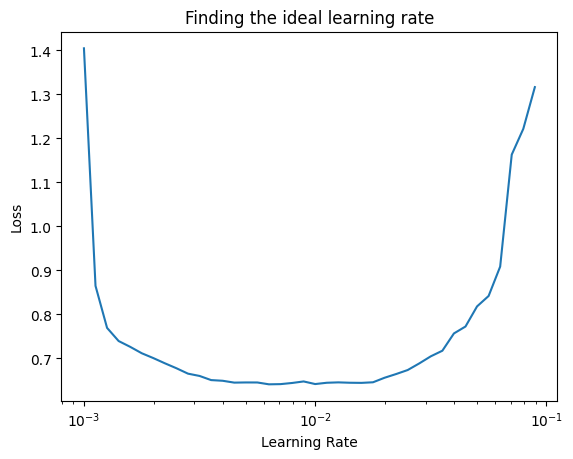

In [18]:
# Plot the learning rate decay curve
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # Want the x-axis to be log-scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In this case, it looks like somewhere close to default learning rate of the Adam Optimizer (0.001) is the ideal learning rate.

Let's refit a model using the ideal learning rate.

In [19]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
]) 

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_3.fit(train_data, train_labels, epochs=20, validation_data=(test_data, test_labels), verbose=1)

Epoch 1/20
1875/1875 [==============================] - 2s 821us/step - loss: 1.1168 - accuracy: 0.6154 - val_loss: 0.8175 - val_accuracy: 0.7141
Epoch 2/20
1875/1875 [==============================] - 1s 770us/step - loss: 0.7431 - accuracy: 0.7267 - val_loss: 0.7351 - val_accuracy: 0.7343
Epoch 3/20
1875/1875 [==============================] - 1s 794us/step - loss: 0.6734 - accuracy: 0.7594 - val_loss: 0.6842 - val_accuracy: 0.7605
Epoch 4/20
1875/1875 [==============================] - 1s 784us/step - loss: 0.6383 - accuracy: 0.7756 - val_loss: 0.6599 - val_accuracy: 0.7730
Epoch 5/20
1875/1875 [==============================] - 2s 799us/step - loss: 0.6207 - accuracy: 0.7827 - val_loss: 0.6473 - val_accuracy: 0.7752
Epoch 6/20
1875/1875 [==============================] - 1s 745us/step - loss: 0.6056 - accuracy: 0.7883 - val_loss: 0.6421 - val_accuracy: 0.7845
Epoch 7/20
1875/1875 [==============================] - 1s 768us/step - loss: 0.5953 - accuracy: 0.7943 - val_loss: 0.6373 -

In [20]:
# Lets create a confusion matrix function

import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sk learn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
    # Create a confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalise it
    n_classes = cm.shape[0] # Find the number of classes we are dealing with 
    
    # Plot the figure and make it pretty
    fig,ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # Colors will represent how 'correct' a class is
    fig.colorbar(cax)
    
    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels=np.arange(cm.shape[0])
        
    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted Label",
           ylabel="True label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)
    
    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    
    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.
    
    # Plot tthe threshold for different colors
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
        horizontalalignment="center",
        color="white" if cm[i,j] > threshold else "black",
        size=text_size)

In [21]:
# Make predictions with the most recent model
y_probs = model_3.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 545us/step


array([[2.61829882e-05, 1.22308719e-09, 4.26562247e-06, 4.84238399e-07,
        1.74775194e-10, 2.91583985e-01, 7.62329989e-07, 6.45123199e-02,
        2.24691294e-02, 6.21402860e-01],
       [3.66956752e-04, 1.38385465e-13, 8.92370641e-01, 1.52002944e-09,
        3.67808132e-03, 9.04686821e-14, 7.86714479e-02, 3.79286554e-36,
        2.49128956e-02, 2.39070621e-22],
       [6.30374765e-04, 9.72314596e-01, 9.85517749e-04, 1.68295465e-02,
        1.33697910e-03, 5.59440069e-03, 9.36046767e-04, 1.23022951e-03,
        1.08600150e-04, 3.38341342e-05],
       [6.30374765e-04, 9.72314596e-01, 9.85517749e-04, 1.68295465e-02,
        1.33697910e-03, 5.59440069e-03, 9.36046767e-04, 1.23022951e-03,
        1.08600150e-04, 3.38341342e-05],
       [9.83984321e-02, 1.35890605e-05, 2.48406842e-01, 5.44551108e-03,
        6.22214414e-02, 4.99923303e-09, 5.76243043e-01, 1.96350654e-19,
        9.27117746e-03, 8.42148660e-12]], dtype=float32)

Our model outputs a list of prediction abbilities, meaning, it outputs a number for how likely it thinks a particular class is to be the label.

The higher the number in the prediction probabilities lis, the more likely the model believes that is the right class.

To find the highest value we can use the argmax() method.

In [22]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle Boot')

Now let's do the same for all of the predictions.

In [23]:
# Convert all of the predictions from probabilities to labels 
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

Wonderful, now we have got our model's prediction in labelled form, let's create a confusion matrix to view them against the truth labels.

In [24]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[658,   9,  16,  84,   5,   2, 191,   0,  34,   1],
       [  0, 954,  10,  30,   5,   0,   1,   0,   0,   0],
       [  9,   9, 676,   9, 169,   1,  99,   0,  28,   0],
       [ 31,  31,  12, 799,  38,   5,  69,   0,   9,   6],
       [  0,  13, 132,  24, 748,   0,  80,   0,   3,   0],
       [  0,   0,   0,   0,   0, 920,   0,  47,   8,  25],
       [122,   7, 148,  56, 139,   3, 490,   0,  33,   2],
       [  0,   0,   0,   0,   0,  60,   0, 917,   1,  22],
       [ 15,   1,  23,   5,   1,  27,  12,   4, 911,   1],
       [  0,   0,   0,   0,   0,  28,   0,  63,  12, 897]], dtype=int64)

That confusion matrix is hard to comprehend, let's make it prettier using the function we created before.

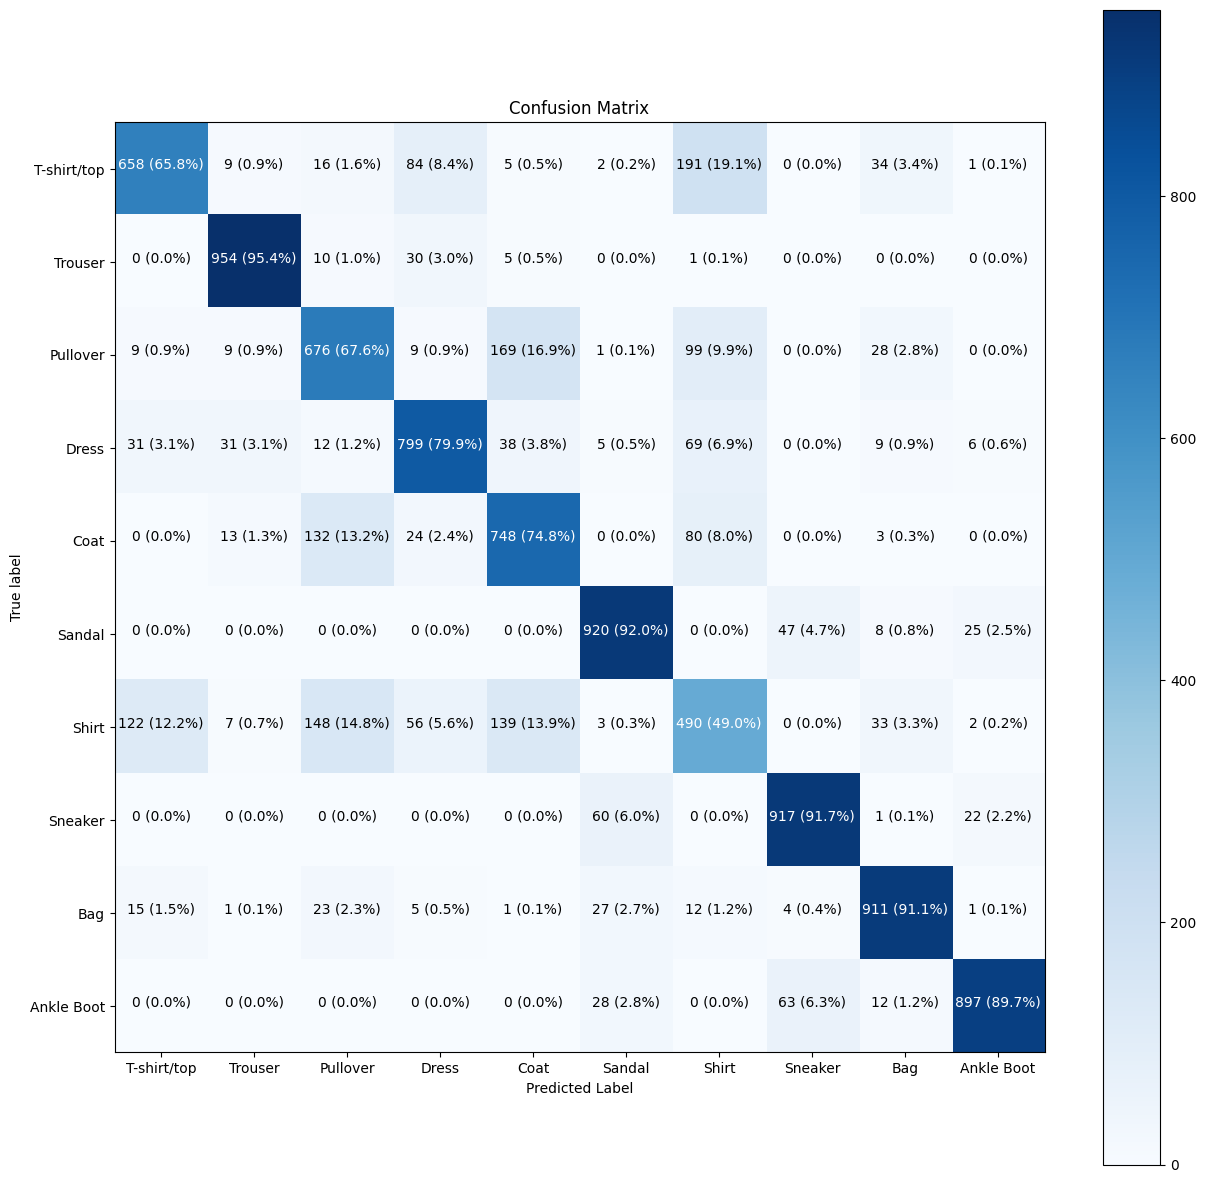

In [25]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

That looks much better!

Except the results aren't as good as they could be...

It looks like our model is getting confused between the shirt and T-Shirt/top classes (eg: predicting Shirt when it's actually a T-shirt/top).

We have seen how our models predictiopns line up to the truth labels using a confusion matrix, but how about we visualize some?
Let's create a function to plot a random image along with it's prediction.

In [26]:
import random
def plot_random_image(model,images,true_labels,classes):
    
    # Setup random integer
    i = random.randint(0, len(images))
    
    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1,28,28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    # Plot the target image
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    # Chnage the color of the title depending on if the predictions is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
        
    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                     100*tf.reduce_max(pred_probs),
                                                     true_label),
               color=color) # Set the color to green or red

1/1 [==============================] - 0s 14ms/step


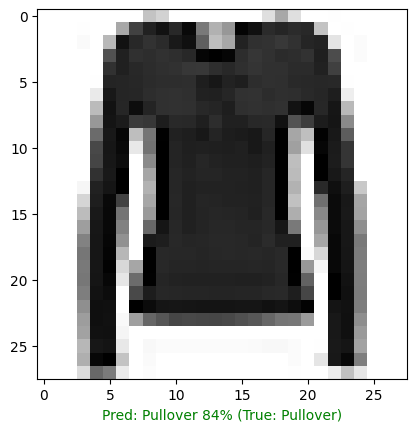

In [33]:
# Check out a random image as well as its prediction
plot_random_image(model=model_3,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)